# Why People Really Quit Their Jobs?
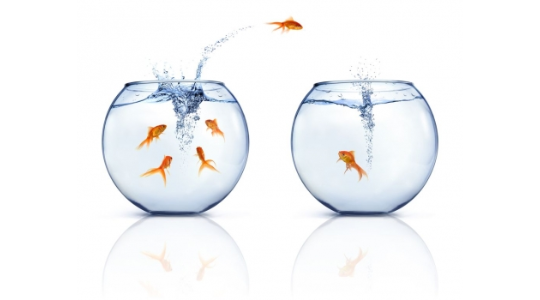


### This dataset is related to the record of the employees in the company.

* It describes the **satisfaction level** of the employee, **last evaluation** of their performance, **number of projects** they done, their **average monthly working hours**, the **number of years** spent in the company, whether the employee had a **workplace accident**, whether the employee **left the workspace** , their **last promotion**, the **department** where the employee works and the **salary level**.

# 1. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# 2. Load Data

For HR analysis it will use a popular dataset called: "HR_comma_sep.csv". From now on : "HR_data_origin.csv". 

In [4]:
hr=pd.read_csv("data/HR_data_origin.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Brief description of columns in DataSet:

- **Satisfaction_level** : Level of employee satisfaction with their work and position. At first, it ties closely with employee turnover. 

- **Last_evaluation**: Column can be used to evaluate the performance of an employee. The data ranges from 0–1, 0 being low performance and 1 being the highest.

- **Number_projects**: number of projects employees done.

- **average_montly_hours**: average monthly hours per employee.

- **time_spend_company**: The data ranges from 1 to 10. Data unit not specified. It will be supposed _years_.

- **Work_accident**: Whether the employee had a workplace accident,: 1 yes, 0 no.

- **left**: Whether the employee has left or not the company: 1 yes, 0 no.

- **promotion_last_5years**: Whether the employee has had a promotion in the last 5 years.

- **Sales**: It seems to indicate the different areas or departments the employees belong: Sales, Technical, Support, IT, Product Managment, Marketing ,Accounting, Human Resources, Managment and Others.

- **Salary**: Salary level classified by Low, Medium, High.

# 3. Analisys Data and Variables

Analize and understand the data in detail in order to make the right assumptions and choose the right algorithm:

* Size 
* Anlysis of descriptive statistics
* Determine variable's type
* Clarify data: name of columns
* Is there any null value?
* Find and remove duplicates
* Anlysis of descriptive statistics

In [5]:
#This dataset contains 14999 rows and 10 columns.
hr.shape

(14999, 10)

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


* "**Work_accident**", "**left**" and "**promotion_last_5years**" are _categorical variables_ and not relevant in this descriptive statistics
* "**sales**" and "**salary**" are not numerical variables so they do not appear above.

In [8]:
#Rename column: "sales". From now on: "department"
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [9]:
hr.columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Which is the turn over ratio of the company?

Customer turnover, also known as churn rate, refers to the percentage of a company's customer base that leaves in a given period of time. Typically, turnover is measured on a month or annual basis. As a general rule, high churn is damaging to a company's revenue and profitability.

As I unknow the period of time of this dataset, I will assume that it has been measured on annual basis.

In [10]:
#number of employees who leave the company
hr.groupby('left')['left'].count()

left
0    11428
1     3571
Name: left, dtype: int64

In [11]:
#Turn over ratio as a result of the division of the number of employee who left the company 
#by the number of total employees at the worksite 

len(hr[hr['left']==1])/len(hr)*100

23.80825388359224

In [12]:
hr.isnull().sum()
#there isn't missing data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [13]:
#Find and remove duplicates.
len(hr[hr.duplicated]==True)

3008

In [14]:
#I have valorated the size of these elements and I feel confortable removing duplicates from the data set
hr_no_dupl= hr.drop_duplicates()
hr_no_dupl.shape

(11991, 10)

In [15]:
hr_no_dupl.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Which is the turnover ratio after removing duplicates?

In [16]:
hr_no_dupl.groupby('left')['left'].count()

left
0    10000
1     1991
Name: left, dtype: int64

In [17]:
#turnover ratio:
len(hr_no_dupl[hr_no_dupl['left']==1])/len(hr_no_dupl)*100

16.604119756484028

In [18]:
#or
turnover_ratio=round(hr_no_dupl['left'].mean()*100,2)
turnover_ratio

16.6

### Let's start by taking a look at **people who stay** and **people who leave** the company

In [19]:
#two well differentiated groups:
people_who_stay= hr_no_dupl[hr_no_dupl['left']==0]
people_who_leave= hr_no_dupl[hr_no_dupl['left']==1]

In [20]:
#sanity check
print(len(people_who_stay))
print(len(people_who_leave))

10000
1991


In [21]:
hr_no_dupl.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


At a glance:

* Employees that decide to leave the company are the one who, on average, work more years in it and also spend working more hours per month (so number of projects are also higher). However, on average they move up less than people who stay at company so it seems to be the reason for a lower satisfaction level and thus leaving the company.

Questions:

* It make sense that average of satisfaction_level and promotion_last_5years in people who stay is higher. But, _is having an accident a key factor to leave the company?_

* The average of last_evaluation is quite similar among both groups. _Does it make sense?_

### Could we know which variable has the most influence to stay or leave a job?

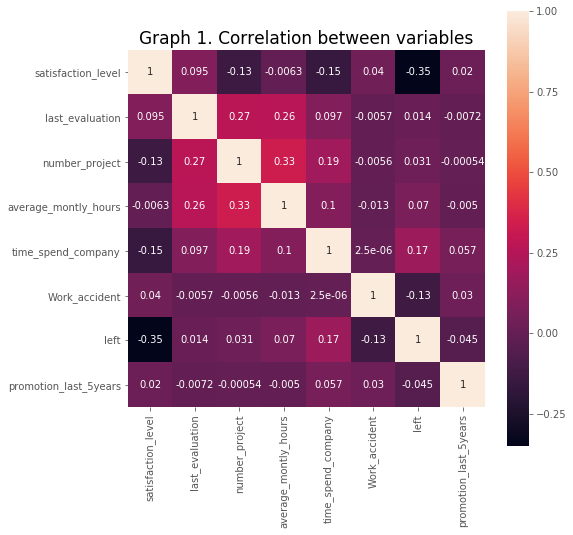

In [22]:
# Correlation heatmap
plt.figure(figsize=(8, 8)) 
sns.heatmap(hr_no_dupl.corr(), vmax=1, square=True,annot=True) 
plt.title("Graph 1. Correlation between variables", fontsize = 17)
plt.show()

#### Graph 1:  

* As expected, the **"satisfaction level" has the largest correlation with the decision to stay or leave** the company (-0.35). "Work_accident" has a negative correlation (-0.13) whereas with the "time_spend_company" it is positive (0.17). 

Graph 1 also shows _the Pearson's correlation coefficient among features_: 

* There is a **negative correlation** coefficient (-0.15) between **"time_spend_company"** and **"satisfaction_level"** . It seems to indicate that __the more years working in the company, the lower level of satisfaction.__


* However,  it also shows a __strong and positive correlation__ among __'last_evaluation'__  and __'number_project'__ and __"average_montly_hours"__. It could  indicate that the __company recognizes and values their employees' capacity and dedication at work.__


# 4. Some quick visualitations 

### 4.1 Headcount by department

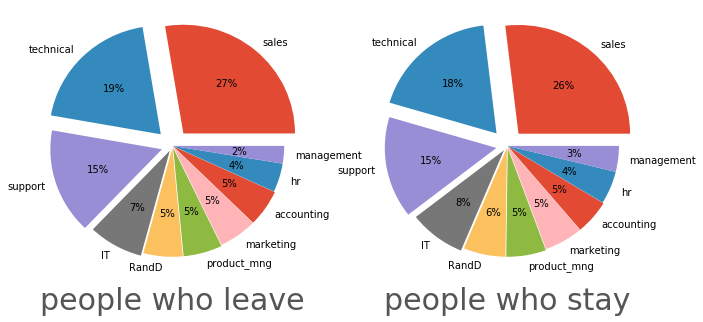

In [25]:
x=hr_no_dupl.groupby('department')['left'].count().sort_values(ascending=False).index
z1= people_who_leave.groupby('department')['left'].count().sort_values(ascending=False).values
z2= people_who_stay.groupby('department')['left'].count().sort_values(ascending=False).values

figure, axs = plt.subplots(ncols=2)
figure.set_size_inches(11,5)
explode=(0.15,0.15,0.1,0.05,0.02,0.02,0.01,0.01,0,0) #highlight the 4 main values

axs[0].pie(z1,labels=x,autopct='%1d%%',explode=explode)
axs[1].pie(z2,labels=x,autopct='%1d%%',explode=explode)

axs[0].set_xlabel('people who leave',fontsize=30)
axs[1].set_xlabel('people who stay',fontsize=30)

plt.show()

### 4.2 Turn Over Ratio by department

In [26]:
#people who leave breakdown by department
people_who_leave_by_department= people_who_leave.groupby('department')['left'].count().reset_index()
people_who_leave_by_department

,department,left
0,IT,158
1,RandD,85
2,accounting,109
3,hr,113
4,management,52
5,marketing,112
6,product_mng,110
7,sales,550
8,support,312
9,technical,390


In [27]:
#total Headcount
headcount_by_department=hr_no_dupl.groupby('department')['left'].count().reset_index()
headcount_by_department

,department,left
0,IT,976
1,RandD,694
2,accounting,621
3,hr,601
4,management,436
5,marketing,673
6,product_mng,686
7,sales,3239
8,support,1821
9,technical,2244


In [28]:
#Merge in just one dataset both tables
headcount = headcount_by_department.reset_index().merge(people_who_leave_by_department,on='department',suffixes=['_total', '_leave'])
headcount

,index,department,left_total,left_leave
0,0,IT,976,158
1,1,RandD,694,85
2,2,accounting,621,109
3,3,hr,601,113
4,4,management,436,52
5,5,marketing,673,112
6,6,product_mng,686,110
7,7,sales,3239,550
8,8,support,1821,312
9,9,technical,2244,390


In [29]:
#Create a new column with the churn ratio calculated 
headcount['turn_over']=np.round((headcount['left_leave']/headcount['left_total'])*100,decimals=1)
headcount_sorted = headcount.sort_values(by='turn_over',ascending=False) #sorted by churn ratio
headcount_sorted

,index,department,left_total,left_leave,turn_over
3,3,hr,601,113,18.8
2,2,accounting,621,109,17.6
9,9,technical,2244,390,17.4
8,8,support,1821,312,17.1
7,7,sales,3239,550,17.0
5,5,marketing,673,112,16.6
0,0,IT,976,158,16.2
6,6,product_mng,686,110,16.0
1,1,RandD,694,85,12.2
4,4,management,436,52,11.9


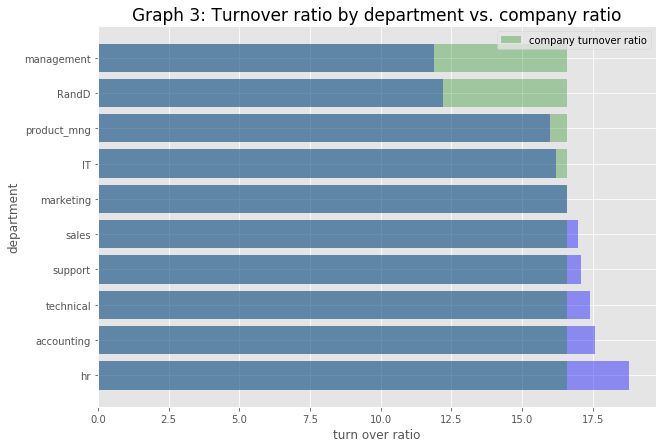

In [30]:
#this graph shows turnover ratio per department vs. Company ratio (16.6%)

plt.figure(figsize=(10,7))
plt.barh(headcount_sorted['department'],headcount_sorted['turn_over'],color='blue',alpha=0.4)
plt.barh(headcount_sorted['department'],turnover_ratio,alpha=.3,color='green', label='company turnover ratio')
plt.xlabel('turn over ratio')
plt.ylabel('department')
plt.legend()
plt.title('Graph 3: Turnover ratio by department vs. company ratio', fontsize= 17)
plt.show()

### 4.3 Accidents at work

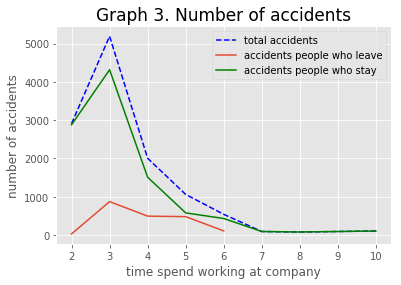

In [31]:
accidents_by_year=hr_no_dupl.groupby('time_spend_company')['Work_accident'].count()
#graph
plt.plot(accidents_by_year,'b--',label='total accidents')
plt.plot(people_who_leave.groupby('time_spend_company')['Work_accident'].count(),label='accidents people who leave')
plt.plot(people_who_stay.groupby('time_spend_company')['Work_accident'].count(),label='accidents people who stay',color='green')
plt.xlabel('time spend working at company')
plt.ylabel('number of accidents')
plt.legend()
plt.title("Graph 3. Number of accidents", fontsize = 17)
plt.show()

### 42.1 Accidents by department

In [32]:
accidents = people_who_leave.groupby('department')['Work_accident'].count().reset_index().merge(
    people_who_stay.groupby('department')['Work_accident'].count().reset_index(), #adding accidents of stay group
    on='department',
    suffixes=['_leave','_stay'])
accidents['total_accidents']=accidents['Work_accident_leave']+accidents['Work_accident_stay']
accidents = accidents.sort_values(by='total_accidents')
accidents

,department,Work_accident_leave,Work_accident_stay,total_accidents
4,management,52,384,436
3,hr,113,488,601
2,accounting,109,512,621
5,marketing,112,561,673
6,product_mng,110,576,686
1,RandD,85,609,694
0,IT,158,818,976
8,support,312,1509,1821
9,technical,390,1854,2244
7,sales,550,2689,3239


In [33]:
#sanity Check
print(accidents['Work_accident_leave'].sum())
print(accidents['Work_accident_stay'].sum())

1991
10000


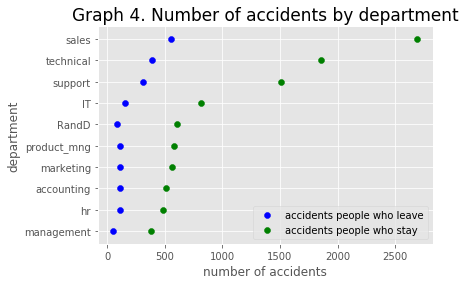

In [34]:
#graph

#plt.scatter(accidents['total_accidents'],accidents['sales'],label='total accidents')
plt.scatter(accidents['Work_accident_leave'],accidents['department'],label='accidents people who leave',color='blue')
plt.scatter(accidents['Work_accident_stay'],accidents['department'],label='accidents people who stay',color='green')

plt.xlabel('number of accidents')
plt.ylabel('department')
plt.legend()
plt.title("Graph 4. Number of accidents by department", fontsize = 17)
plt.show()

In [35]:
hr_no_dupl.groupby('Work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years
Work_accident,,,,,,,
0,0.625546,0.717092,3.805640,200.741150,3.364856,0.185978,0.015284
1,0.652200,0.714438,3.787568,199.006486,3.364865,0.056757,0.025946


* In relation with other features, if I compare people who have accident and people who don't have, I realize that there are no material differences among them. I mean, the values are quite similar.

### 4.3 Salary

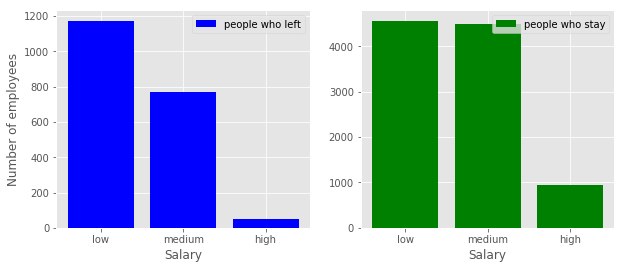

In [36]:
X=hr_no_dupl['salary'].unique()
Y1=people_who_leave.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values
Y2=people_who_stay.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values


figure, axs = plt.subplots(ncols=2)

axs[0].bar(X, Y1,color='blue')
axs[1].bar(X, Y2,color='green')
axs[0].set_ylabel('Number of employees')
axs[0].set_xlabel('Salary')
axs[1].set_xlabel('Salary')

figure.set_size_inches(10,4)

axs[0].legend(['people who left'])
axs[1].legend(['people who stay'])
plt.show()

### 4.4 Employee satisfaction level

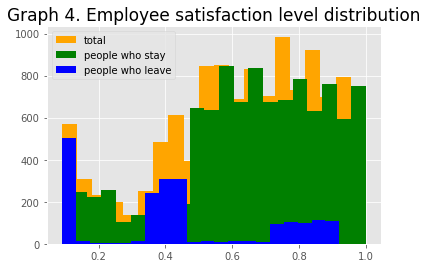

Mean satisfaction of total employees is 63 percent
Mean satisfaction of employees who leave is 44 percent
Mean satisfaction of employees who stay is 67 percent


In [37]:
#Graph:
plt.hist(hr_no_dupl.satisfaction_level,bins=20,color='orange',label='total') 
plt.hist(people_who_stay.satisfaction_level,bins=20,color='green',label='people who stay',) #people who stay
plt.hist(people_who_leave.satisfaction_level,bins=20,color='blue',label='people who leave') #people who leave
plt.title("Graph 4. Employee satisfaction level distribution", fontsize = 17)
plt.legend()
plt.show()

print('Mean satisfaction of total employees is %.f percent'%(hr_no_dupl.satisfaction_level.mean()*100)) 
print('Mean satisfaction of employees who leave is %.f percent' %(people_who_leave.satisfaction_level.mean()*100))
print('Mean satisfaction of employees who stay is %.f percent' %(people_who_stay.satisfaction_level.mean()*100))

### 4.5 Satisfaction level

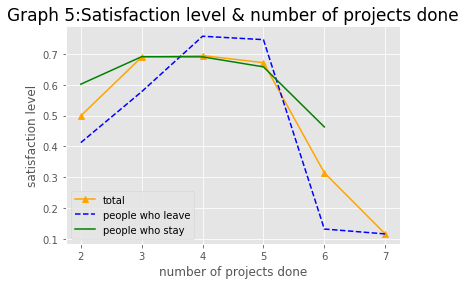

In [38]:
plt.plot(hr_no_dupl.groupby('number_project')['satisfaction_level'].mean(),'orange',label='total',marker='^')
plt.plot(people_who_leave.groupby('number_project')['satisfaction_level'].mean(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('number_project')['satisfaction_level'].mean(),'green',label='people who stay')
plt.ylabel('satisfaction level')
plt.xlabel('number of projects done')
plt.legend()
plt.title('Graph 5:Satisfaction level & number of projects done', fontsize = 17)
plt.show()

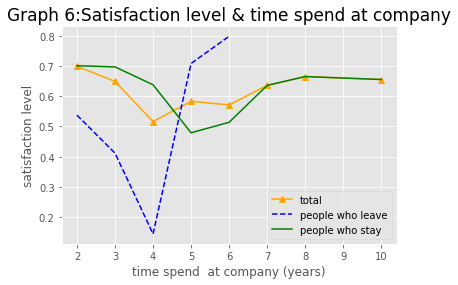

In [39]:
plt.plot(hr_no_dupl.groupby('time_spend_company')['satisfaction_level'].mean(),'orange',label='total',marker='^')
plt.plot(people_who_leave.groupby('time_spend_company')['satisfaction_level'].mean(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('time_spend_company')['satisfaction_level'].mean(),'green',label='people who stay')
plt.ylabel('satisfaction level')
plt.xlabel('time spend  at company (years)')
plt.legend()
plt.title('Graph 6:Satisfaction level & time spend at company', fontsize = 17)
plt.show()

Satisfaction level & salaries (TBD)
* Employees in high salary group have lower satisfaction level compared to the low and medium group whether they leave or stay (FALTA GRAFICO)
* Employees who left have lower satisfaction level in each salary tranche.

### Some conclusions and next steps

* Sales, Technical and Support are the departments with a higher number of employees (50% over total. _See graph 1_)

* The departments aforementioned, HR and Accounting have a turnover ratio above the average. Instead Management is far below the average, probably (don't know yet) because their salaries were higher (_See graph 2_)

* _Graph 3_ shows that:
    - the higher number of accidents take place during the third year working at company
    - people who left has less accidents than people who stay
    
* As expected, a higher number of employees left in the low salary group compared to the high salary group (_Section 4.3_)

* Satisfaction level is quite higher in employees stayed the company than employees who left (_see graphs 5 and 6_)

# 5. Data quality issues 

In [40]:
hr_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
department               11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


After a quick review of the dataset I realise some issues such that:

* To deal better with ML algorithms and statistics the features must have a NUMERICAL value. Therefore ,some **features (sales and salary)** will be transformed to numerical.


- **left** : as "target" column, it should occupy the last position in the dataframe. It will be moved to there.

**1. Convert to numerical** : "salary" and "sales"

In [41]:
hr_no_dupl['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [42]:
#Dummy Coding
hr_salary = pd.get_dummies(hr_no_dupl['salary'])
hr_salary.sample(10)

,high,low,medium
11202,0,0,1
7307,0,1,0
569,0,0,1
5958,0,0,1
3825,0,1,0
5702,0,0,1
11645,0,0,1
5931,0,0,1
7099,0,0,1
6226,0,1,0


In [43]:
#join
hr2=pd.merge(hr_no_dupl,hr_salary,left_index=True, right_index=True)
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [44]:
#Now it is the turn of "department" 
hr2['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [45]:
hr_department= hr2['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'], 
                                  [0,1,2,3,4,5,6,7,8,9],#new values
                                 inplace = False) #it will be modified in place
hr_department

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
11970    8
11971    1
11972    1
11973    6
11974    6
11975    5
11976    8
11977    8
11978    8
11979    0
11980    0
11981    0
11982    0
11983    0
11984    0
11985    0
11986    6
11987    7
11988    7
11989    7
11990    7
11991    6
11992    6
11993    5
11994    5
11995    5
11996    5
11997    5
11998    8
11999    6
Name: department, Length: 11991, dtype: int64

In [46]:
#finally, we include this values into the dataFrame as "department_numeric" columnn
hr2['department_numeric']=hr_department
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0,0


In [47]:
#Now, I can remove "sales" and "salary" columns from DataFrame.Therefore it will include only numeric features
hr_numeric=hr2.drop(columns=['department','salary'])
hr_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0


**2.Change the order of columns**: "left" column as "target" will be moved to the final of the data frame

In [48]:
cols = hr_numeric.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric']

In [49]:
#Now "left" column will be the last one
cols_new = cols[:6]+cols[7:]+cols[6:7]
cols_new

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric',
 'left']

In [50]:
#finally, it's included in the new dataframe called: hr_data
hr_data= hr_numeric[cols_new]
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,department_numeric,left
0,0.38,0.53,2,157,3,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,0,1


In [51]:
#check values' type: 
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 12 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
promotion_last_5years    11991 non-null int64
high                     11991 non-null uint8
low                      11991 non-null uint8
medium                   11991 non-null uint8
department_numeric       11991 non-null int64
left                     11991 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 1.3 MB


# 6. Saving cleaned dataset

In [72]:
hr_data.to_csv('data/HR_data_cleaned.csv',index=False)